In [127]:
# !pip install pyspark
# !pip install imblearn
# !pip install seaborn

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import sklearn.model_selection as model_selection
import pyspark
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

### Read the data

In [129]:
df = pd.read_csv('body_level_classification_train.csv')
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [130]:
df.describe()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.290420,1.701602,86.542290,2.421912,2.005120,2.682104,1.023106,0.650672
std,6.323081,0.094654,26.278277,0.540711,0.620307,0.790751,0.844840,0.605199
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.895877,1.629194,65.000000,2.000000,1.549931,2.644692,0.145687,0.000000
50%,22.720449,1.701284,82.636162,2.416044,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.770278,106.690530,3.000000,2.482933,3.000000,1.672639,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


In [131]:
df.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

## Visualization

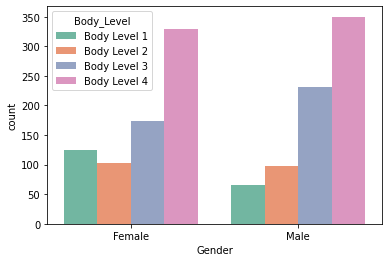

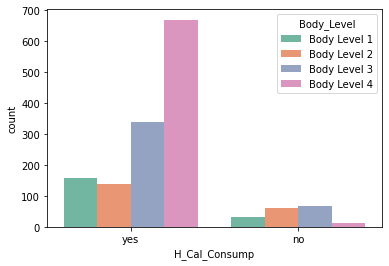

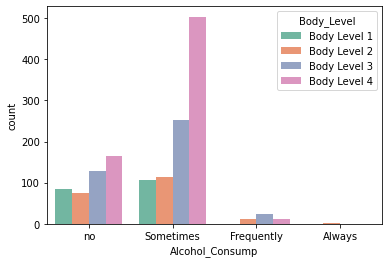

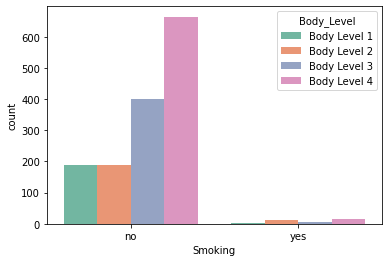

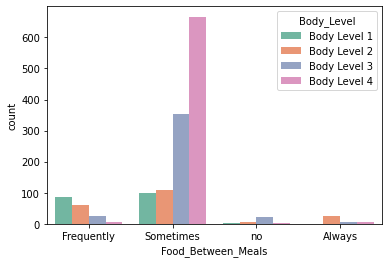

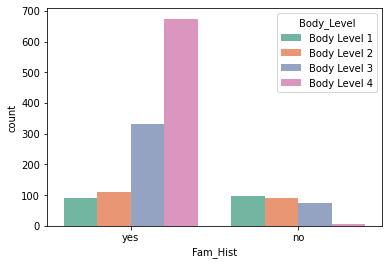

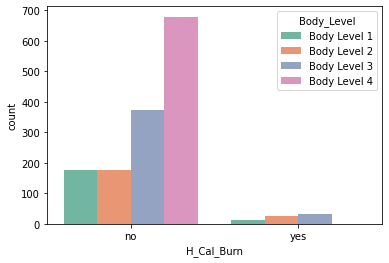

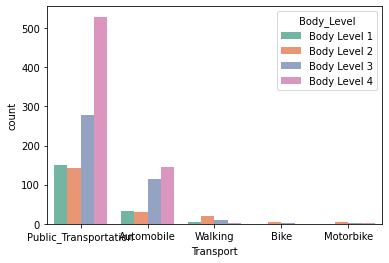

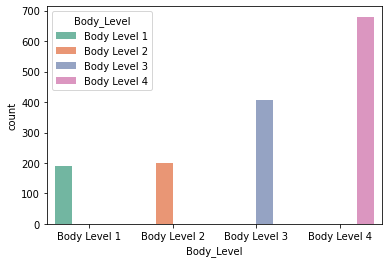

In [132]:
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure()
        sns.countplot(x = col, data = df, hue = 'Body_Level', palette='Set2')
        plt.show()

**Observation**

The data is imbalanced and class 4 captures the majority of the data.

#### Convert Categorical to Numerical

In [133]:
for col in ["Gender", "H_Cal_Consump", "Alcohol_Consump", "Smoking", "Food_Between_Meals", "Fam_Hist", "H_Cal_Burn", "Transport","Body_Level"]:
    df[col] = pd.Categorical(df[col], categories=df[col].unique()).codes
    

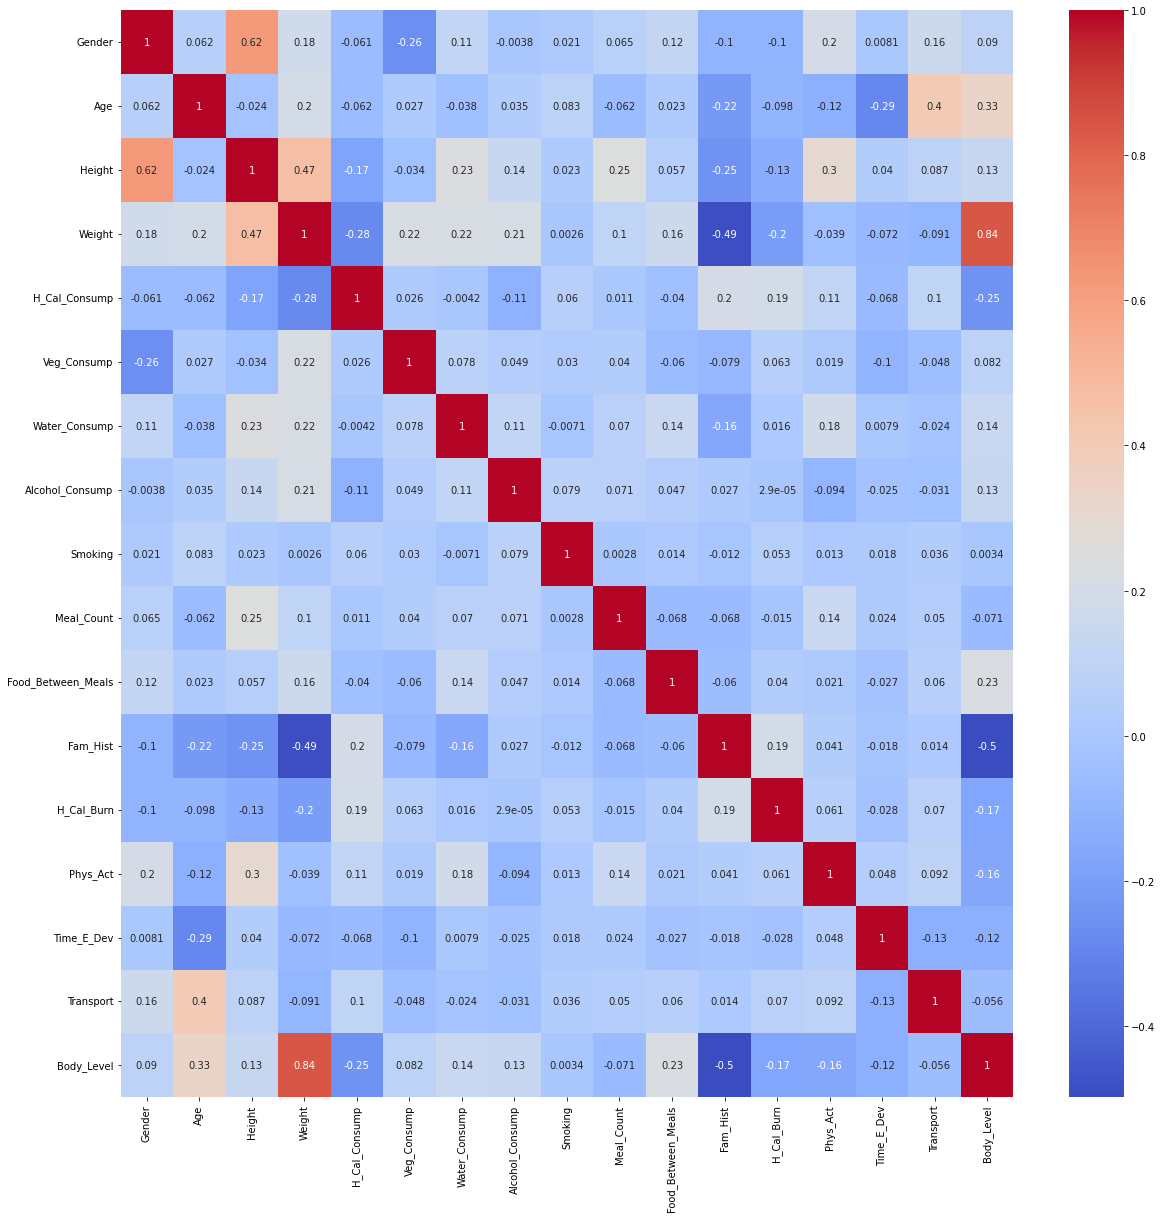

In [134]:
## correlation matrix
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**observation**

Body Level is strongly correlated with ( weight , age , Food_between_Meals , Water_Consumption , Alchohol_Consumption , ..)

### multi_class Parameter:
The handling of multinomial classification problems. This can be 'auto', 'ovr', or 'multinomial'. The default value is 'auto'.

In [135]:
# separate the features and target variable
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 


multi_classes = ['multinomial', 'ovr']
score = [0,0]

# Logistic Regression
for i, multi_class in enumerate(multi_classes):
    print(f"Training Logistic Regression Classifier with {multi_class}")
    model = LogisticRegression(multi_class = multi_class,max_iter = 30000).fit(X_train, y_train)

    # Predicting the Test set results
    y_train_predict = model.predict(X_train)
    print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
    y_test_predict = model.predict(X_test)
    print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")


    # create a KFold object
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')
    
    score[i] = f"{scores.mean():.5f}  (+/- {scores.std():.5f})"

pd.DataFrame({'multi_class_type': multi_classes, 'score': score})


Training Logistic Regression Classifier with multinomial
Training Accurracy: 89.44820909970959%
Testing Accurracy: 86.93693693693693%
Training Logistic Regression Classifier with ovr
Training Accurracy: 84.99515972894483%
Testing Accurracy: 81.08108108108108%


,multi_class_type,score
0,multinomial,0.82830 (+/- 0.02952)
1,ovr,0.74528 (+/- 0.02024)


**Observation:**

We noticed that using multinomial technique over one-versus-rest.

multinomial perform better than ovr when there are strong correlations between the classes so dealing with the problem as a binary problem not the best.

### solver Parameter: 
The algorithm to be used for optimization. This can be 'newton-cg', 'lbfgs', 'liblinear', 'sag', or 'saga'. The default value is 'lbfgs'.



In [136]:
# separate the features and target variable
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
score = [0,0,0,0]

# Logistic Regression
for i, solver in enumerate(solvers):
    print(f"Training Logistic Regression Classifier with {solver} solver")
    model = LogisticRegression(multi_class = "multinomial",solver = solver,max_iter = 30000).fit(X_train, y_train)

    # Predicting the Test set results
    y_train_predict = model.predict(X_train)
    print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
    y_test_predict = model.predict(X_test)
    print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")


    # create a KFold object
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')
    
    score[i] = f"{scores.mean():.5f}  (+/- {scores.std():.5f})"

pd.DataFrame({'solver': solvers, 'mean scores': score})

Training Logistic Regression Classifier with newton-cg solver
Training Accurracy: 89.351403678606%
Testing Accurracy: 86.93693693693693%
Training Logistic Regression Classifier with lbfgs solver
Training Accurracy: 89.44820909970959%
Testing Accurracy: 86.93693693693693%
Training Logistic Regression Classifier with sag solver
Training Accurracy: 87.99612778315586%
Testing Accurracy: 82.65765765765765%
Training Logistic Regression Classifier with saga solver
Training Accurracy: 87.41529525653436%
Testing Accurracy: 81.53153153153153%


,solver,mean scores
0,newton-cg,0.82830 (+/- 0.02952)
1,lbfgs,0.82830 (+/- 0.02952)
2,sag,0.79268 (+/- 0.03122)
3,saga,0.77190 (+/- 0.03370)


#### penalty Parameter: 
The regularization penalty to be used. This can be 'l1', 'l2', 'elasticnet', or 'none'. The default value is 'l2'


In [137]:
# separate the features and target variable
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 


# Logistic Regression
penalty = 'l2'
print(f"Training Logistic Regression Classifier with {penalty} Regularization")
model = LogisticRegression(multi_class = "multinomial",solver = 'lbfgs', penalty = penalty,max_iter = 50000).fit(X_train, y_train)

# Predicting the Test set results
y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")


# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')

# Print the classification report and mean F1 score
print(classification_report(y_test, model.predict(X_test)))
print("Mean F1 score:", scores.mean())

# print the mean and standard deviation of the scores
print(f"Accuracy after applying cross validation: {scores.mean():.5f} (+/- {scores.std():.5f})")
print("------------------------------------------------------------------------")

Training Logistic Regression Classifier with l2 Regularization
Training Accurracy: 89.44820909970959%
Testing Accurracy: 86.93693693693693%
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        57
           1       0.83      0.56      0.67        61
           2       0.78      0.91      0.84       122
           3       0.96      0.92      0.94       204

    accuracy                           0.87       444
   macro avg       0.85      0.83      0.83       444
weighted avg       0.88      0.87      0.87       444

Mean F1 score: 0.8283040110496392
Accuracy after applying cross validation: 0.82830 (+/- 0.02952)
------------------------------------------------------------------------


#### C Parameter: 
The inverse of the regularization strength. Smaller values of C specify stronger regularization. The default value is 1.0.

In [138]:
# separate the features and target variable
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 

Cs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
score = [0,0,0,0,0,0,0,0]
# Logistic Regression
for i,c in enumerate(Cs):
    print(f"Training Logistic Regression Classifier with {c} Regularization strength")
    model = LogisticRegression(multi_class = "multinomial",solver = 'lbfgs', penalty = 'l2', C=c ,max_iter = 50000).fit(X_train, y_train)

    # Predicting the Test set results
    y_train_predict = model.predict(X_train)
    print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
    y_test_predict = model.predict(X_test)
    print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")


    # create a KFold object
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')

    
    score[i] = f"{scores.mean():.5f}  (+/- {scores.std():.5f})"

pd.DataFrame({'C': Cs, 'mean scores': score})

Training Logistic Regression Classifier with 0.1 Regularization strength
Training Accurracy: 84.12391093901257%
Testing Accurracy: 80.85585585585585%
Training Logistic Regression Classifier with 0.2 Regularization strength
Training Accurracy: 86.64085188770572%
Testing Accurracy: 83.55855855855856%
Training Logistic Regression Classifier with 0.3 Regularization strength
Training Accurracy: 87.60890609874153%
Testing Accurracy: 84.68468468468468%
Training Logistic Regression Classifier with 0.4 Regularization strength
Training Accurracy: 87.89932236205227%
Testing Accurracy: 85.13513513513513%
Training Logistic Regression Classifier with 0.5 Regularization strength
Training Accurracy: 88.18973862536302%
Testing Accurracy: 85.58558558558559%
Training Logistic Regression Classifier with 0.6 Regularization strength
Training Accurracy: 88.48015488867377%
Testing Accurracy: 86.03603603603604%
Training Logistic Regression Classifier with 0.7 Regularization strength
Training Accurracy: 88.4801

,C,mean scores
0,0.1,0.78073 (+/- 0.04378)
1,0.2,0.79976 (+/- 0.02771)
2,0.3,0.80938 (+/- 0.02895)
3,0.4,0.81358 (+/- 0.02974)
4,0.5,0.81117 (+/- 0.03048)
5,0.6,0.81497 (+/- 0.03372)
6,0.7,0.81658 (+/- 0.03248)
7,0.8,0.81877 (+/- 0.03295)


#### class_weight Parameter: 
The weights to assign to each class. This can be 'balanced' to automatically adjust the weights based on the class frequencies, or a dictionary with custom weights.

In [139]:
# separate the features and target variable
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 


# we will use the class_weight parameter to weight the classes
frequencies = df['Body_Level'].value_counts()
count = df['Body_Level'].count()
freq_level1,freq_level2,freq_level3,freq_level4 = frequencies[0]/count,frequencies[1]/count,frequencies[2]/count,frequencies[3]/count
class_weight =  {0: freq_level1, 1: freq_level2, 2: freq_level3, 3: freq_level4}

# Logistic Regression
model = LogisticRegression(class_weight=class_weight,multi_class = "multinomial",solver = 'lbfgs', penalty = 'l2', C=0.8 ,max_iter = 50000).fit(X_train, y_train)


# Predicting the Test set results
y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")


# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')

# Print the classification report and mean F1 score
print(classification_report(y_test, model.predict(X_test)))

# print the mean and standard deviation of the scores
print(f"Accuracy after applying cross validation: {scores.mean():.5f} (+/- {scores.std():.5f})")


Training Accurracy: 86.44724104549854%
Testing Accurracy: 81.98198198198197%
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        57
           1       0.79      0.31      0.45        61
           2       0.73      0.82      0.77       122
           3       0.91      0.94      0.92       204

    accuracy                           0.82       444
   macro avg       0.79      0.75      0.74       444
weighted avg       0.82      0.82      0.80       444

Accuracy after applying cross validation: 0.77117 (+/- 0.05104)


### Apply Principle Component Analysis on the features 

In [158]:
# separate the features and target variable
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

pca = PCA(n_components=11)
# Fit the PCA model to the data
pca.fit(X)
# Transform the data using the fitted PCA model
X = pca.transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 


# Logistic Regression
model = LogisticRegression(multi_class = "multinomial",solver = 'lbfgs', penalty = 'l2', C = 0.8 ,max_iter = 50000).fit(X_train, y_train)


# Predicting the Test set results
y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")


# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')

# Print the classification report and mean F1 score
print(classification_report(y_test, model.predict(X_test)))

# print the mean and standard deviation of the scores
print(f"Accuracy after applying cross validation: {scores.mean():.5f} (+/- {scores.std():.5f})")

Training Accurracy: 87.70571151984511%
Testing Accurracy: 85.58558558558559%
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        57
           1       0.84      0.52      0.65        61
           2       0.77      0.87      0.82       122
           3       0.94      0.91      0.93       204

    accuracy                           0.86       444
   macro avg       0.84      0.82      0.82       444
weighted avg       0.86      0.86      0.85       444

Accuracy after applying cross validation: 0.80786 (+/- 0.04323)


#### Normalize the features

In [141]:
# separate the features and target variable
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 


# Normalized data
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.fit_transform(X_test)



# Logistic Regression
model = LogisticRegression(multi_class = "multinomial",solver = 'lbfgs', penalty = 'l2', C = 0.8 ,max_iter = 50000).fit(X_train, y_train)


# Predicting the Test set results
y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")


# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')

# Print the classification report and mean F1 score
print(classification_report(y_test, model.predict(X_test)))

# print the mean and standard deviation of the scores
print(f"Accuracy after applying cross validation: {scores.mean():.5f} (+/- {scores.std():.5f})")


Training Accurracy: 94.28848015488867%
Testing Accurracy: 92.11711711711712%
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        57
           1       0.97      0.52      0.68        61
           2       0.87      0.97      0.92       122
           3       0.99      0.99      0.99       204

    accuracy                           0.92       444
   macro avg       0.91      0.87      0.87       444
weighted avg       0.93      0.92      0.91       444

Accuracy after applying cross validation: 0.81877 (+/- 0.03295)


### Select numerical features

In [142]:
# separate the features and target variable
X = df[['Age', 'Height', 'Weight','Veg_Consump','Water_Consump','Meal_Count','Phys_Act','Time_E_Dev']]
y = df['Body_Level']


# Oversampling to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 


# Normalized data
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.fit_transform(X_test)

# Logistic Regression
model = LogisticRegression(multi_class = "multinomial",solver = 'lbfgs', penalty = 'l2', C = 0.8 ,max_iter = 50000).fit(X_train, y_train)


# Predicting the Test set results
y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")


# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')

# Print the classification report and mean F1 score
print(classification_report(y_test, model.predict(X_test)))

# print the mean and standard deviation of the scores
print(f"Accuracy after applying cross validation: {scores.mean():.5f} (+/- {scores.std():.5f})")


Training Accurracy: 96.84873949579831%
Testing Accurracy: 96.20098039215686%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       204
           1       0.98      0.90      0.94       204
           2       0.93      0.98      0.96       204
           3       1.00      0.97      0.99       204

    accuracy                           0.96       816
   macro avg       0.96      0.96      0.96       816
weighted avg       0.96      0.96      0.96       816

Accuracy after applying cross validation: 0.83216 (+/- 0.02564)


### Over Sampling to handle class imbalance

In [143]:
# separate the features and target variable
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']


# Oversampling to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=42) 


# Normalized data
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.fit_transform(X_test)

# Logistic Regression
model = LogisticRegression(multi_class = "multinomial",solver = 'lbfgs', penalty = 'l2', C = 0.8 ,max_iter = 50000).fit(X_train, y_train)


# Predicting the Test set results
y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")
weighted_f1_score = f1_score(y_test, y_test_predict, average='weighted')
print(f"F1 Score: {weighted_f1_score * 100}%")

# create a KFold object
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)

# Print the classification report and mean F1 score
print(classification_report(y_test, model.predict(X_test)))

print('Cross Validation accuracy scores: %s' % scores)
# print the mean and standard deviation of the scores
print(f"Accuracy after applying cross validation: {scores.mean():.5f} (+/- {scores.std():.5f})")


Training Accurracy: 96.69117647058823%
Testing Accurracy: 96.69117647058823%
F1 Score: 96.68849541297102%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       204
           1       0.99      0.93      0.96       204
           2       0.93      0.98      0.95       204
           3       0.98      0.97      0.98       204

    accuracy                           0.97       816
   macro avg       0.97      0.97      0.97       816
weighted avg       0.97      0.97      0.97       816

Cross Validation accuracy scores: [0.87132353 0.86580882 0.86029412 0.86764706 0.87132353]
Accuracy after applying cross validation: 0.86728 (+/- 0.00409)


In [144]:
from sklearn.model_selection import GridSearchCV

X = df.drop('Body_Level', axis=1)
y = df['Body_Level']


# Oversampling to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

param_grid = {'penalty': ['l1', 'l2','elasticnet'],
              'C': [i for i in np.arange(0.1, 1.1, 0.1)],
              'solver': ['newton-cg', 'lbfgs'],
              'multi_class':['multionmial', 'ovr']}

clf = LogisticRegression(max_iter=50000)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

best_clf = grid_search.best_estimator_

best_clf

/home/menna/.local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/menna/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/menna/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/menna/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in 

LogisticRegression(max_iter=50000, multi_class='ovr', solver='newton-cg')